# Un nuovo modulo: Pandas

https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas

Usiamo il codice della scorsa lezione per importare i dati meteo:

```
import datetime as dt
from bs4 import BeautifulSoup
from urllib import request

url = 'https://dati.meteotrentino.it/service.asmx/ultimiDatiStazione?codice=T0212'
response = request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`;
soup = BeautifulSoup(text,'xml')

list_temp = []
list_data = []
for temp in soup.find_all("temperatura_aria"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_temp.append(float(temp.contents[3].contents[0]))

```

Abbiamo due liste, date e dati di temperatura.


Esistono due nuove strutture di dati simili a delle tabelle:
* Series
* Dataframe




In [ ]:
import datetime as dt
from bs4 import BeautifulSoup
from urllib import request

url = 'https://dati.meteotrentino.it/service.asmx/ultimiDatiStazione?codice=T0212'
response = request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`;
soup = BeautifulSoup(text,'xml')

list_temp = []
list_data = []
for temp in soup.find_all("temperatura_aria"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_temp.append(float(temp.contents[3].contents[0]))

# Un nuovo modulo: Pandas

https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas

Usiamo il codice della scorsa lezione per importare i dati meteo:

```
import datetime as dt
from bs4 import BeautifulSoup
from urllib import request

url = 'https://dati.meteotrentino.it/service.asmx/ultimiDatiStazione?codice=T0212'
response = request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`;
soup = BeautifulSoup(text,'xml')

list_temp = []
list_data = []
for temp in soup.find_all("temperatura_aria"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_temp.append(float(temp.contents[3].contents[0]))

```

Abbiamo due liste, date e dati di temperatura.


Esistono due nuove strutture di dati simili a delle tabelle:
* Series
* Dataframe




# Un nuovo modulo: Pandas

https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas

Usiamo il codice della scorsa lezione per importare i dati meteo:

```
import datetime as dt
from bs4 import BeautifulSoup
from urllib import request

url = 'https://dati.meteotrentino.it/service.asmx/ultimiDatiStazione?codice=T0212'
response = request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`;
soup = BeautifulSoup(text,'xml')

list_temp = []
list_data = []
for temp in soup.find_all("temperatura_aria"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_temp.append(float(temp.contents[3].contents[0]))

```

Abbiamo due liste, date e dati di temperatura.


Esistono due nuove strutture di dati simili a delle tabelle:
* Series
* Dataframe




# Series

La serie è un array monodimensionale costituito da:

* indice, sono le etichette delle nostre righe
* una serie di dati con la stessa lunghezza dell'indice

Gli indici possono essere duplicati,ma non tutte le operazioni con le serie permettono duplicati.

Possiamo trasformare i nostri dati in una tabella con indice le date e valori le temperature:

```
import pandas as pd
serie_temp = pd.Series(list_temp, index=list_data)
```

Pssiamo aggiungere un nome alla nostra serie passando l'argomento `name="temperature"`



In [ ]:
import pandas as pd
serie_temp = pd.Series(list_temp, index=list_data, name="temperatura")
serie_temp.head()

2023-12-05 00:00:00   -2.2
2023-12-05 00:15:00   -2.3
2023-12-05 00:30:00   -2.1
2023-12-05 00:45:00   -2.1
2023-12-05 01:00:00   -2.1
Name: temperatura, dtype: float64

Proviamo ad accedere a un singolo dato come facevamo per i dizionari:
```
serie_temp.loc["2023-12-04 00:00:00"]
```
L'indice è come se fosse una chiave.

Per accedere a un intervallo di righe utilizzare:
```
serie_temp[t1:t2]
```
dove t1 e t2 devono essere coerenti con il tipo di indice.

In [ ]:
serie_temp["2023-12-05 08:00:00"]

-1.7

In [ ]:
t1 = dt.datetime.strptime("2023-12-05 08:00:00", "%Y-%m-%d %H:%M:%S")
t2 = dt.datetime.strptime("2023-12-05 10:00:00", "%Y-%m-%d %H:%M:%S")
serie_temp.loc[t1]
print(serie_temp[t1:t2])

2023-12-05 08:00:00   -1.7
2023-12-05 08:15:00   -1.5
2023-12-05 08:30:00   -1.4
2023-12-05 08:45:00   -1.3
2023-12-05 09:00:00   -1.1
2023-12-05 09:15:00   -1.1
2023-12-05 09:30:00   -0.9
2023-12-05 09:45:00   -0.7
2023-12-05 10:00:00   -0.7
Name: temperatura, dtype: float64


Troviamo i valori massimi della serie e l'orario corrispondente utilizzando i metodi della classe series

In [ ]:
print(serie_temp.idxmax(), serie_temp[serie_temp.idxmax()])

2023-12-06 14:00:00 3.9


In [ ]:
serie_temp[serie_temp==serie_temp.max()] # così riesco a trovare più massimi

2023-12-06 14:00:00    3.9
Name: temperatura, dtype: float64

In [ ]:
print(serie_temp[serie_temp==-2.1]) # così riesco a trovare più massimi

2023-12-05 00:30:00   -2.1
2023-12-05 00:45:00   -2.1
2023-12-05 01:00:00   -2.1
2023-12-05 01:30:00   -2.1
2023-12-05 03:15:00   -2.1
Name: temperatura, dtype: float64


## Groupby

Proviamo a calcolarci la media oraria, il massimo e il minimo orario utilizzando il medoto


`grouped = serie_temp.groupby(pd.Grouper(freq="H")).mean()`


Proviamo a fare dei grafici per entrambe le serie usando il metodo plot. Gli argomenti del metodo plot: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

In [ ]:
medie=serie_temp.groupby(pd.Grouper(freq="H")).mean()
medie.head()

2023-12-05 00:00:00   -2.175
2023-12-05 01:00:00   -2.125
2023-12-05 02:00:00   -2.275
2023-12-05 03:00:00   -2.225
2023-12-05 04:00:00   -2.000
Freq: H, Name: temperatura, dtype: float64

<Axes: xlabel='time', ylabel='temperature'>

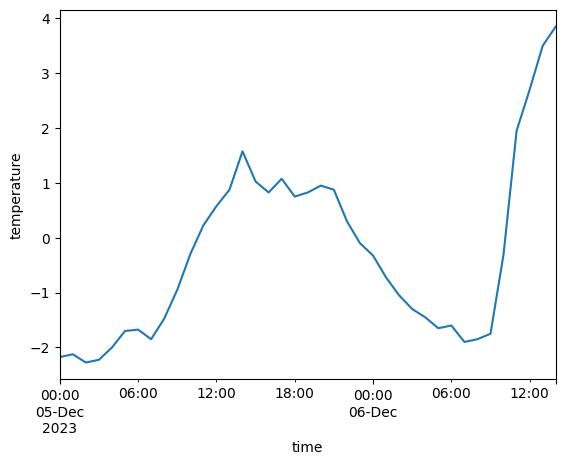

In [ ]:
medie.plot(xlabel="time", ylabel="temperature")

DatetimeIndex(['2023-12-05 00:00:00', '2023-12-05 00:15:00',
               '2023-12-05 00:30:00', '2023-12-05 00:45:00',
               '2023-12-05 01:00:00', '2023-12-05 01:15:00',
               '2023-12-05 01:30:00', '2023-12-05 01:45:00',
               '2023-12-05 02:00:00', '2023-12-05 02:15:00',
               ...
               '2023-12-06 12:00:00', '2023-12-06 12:15:00',
               '2023-12-06 12:30:00', '2023-12-06 12:45:00',
               '2023-12-06 13:00:00', '2023-12-06 13:15:00',
               '2023-12-06 13:30:00', '2023-12-06 13:45:00',
               '2023-12-06 14:00:00', '2023-12-06 14:15:00'],
              dtype='datetime64[ns]', length=154, freq=None)

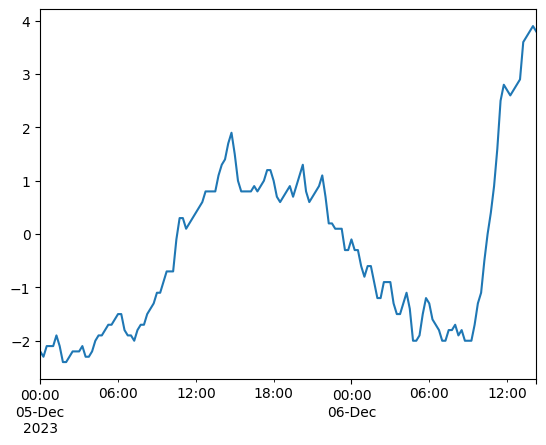

In [ ]:
serie_temp.plot()
serie_temp.index

# Dataframe

Creiamo un nuovo data frame, una tabella quindi con più colonne.

df = pd.DataFrame(index=list_data, columns=["temperature", "precipitazione"])

Proviamo a creare, utilizzado i dati della nostra stazione, un dataframe con tutti i valori delle variabili misurate e creiamo un grafico per ciascuna di esse.

<Axes: >

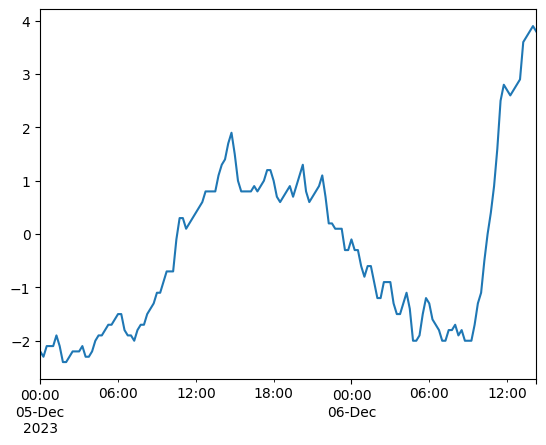

In [ ]:
df_completo = pd.DataFrame(index=list_data,columns=["temperatura"])
df_completo["temperatura"]=list_temp
df_completo.head()
df_completo["temperatura"].plot()

In [ ]:
df_completo["hour"]=df_completo.index.hour
df_completo.head(10)

,temperatura,hour
2023-12-05 00:00:00,-2.2,0
2023-12-05 00:15:00,-2.3,0
2023-12-05 00:30:00,-2.1,0
2023-12-05 00:45:00,-2.1,0
2023-12-05 01:00:00,-2.1,1
2023-12-05 01:15:00,-1.9,1
2023-12-05 01:30:00,-2.1,1
2023-12-05 01:45:00,-2.4,1
2023-12-05 02:00:00,-2.4,2
2023-12-05 02:15:00,-2.3,2


In [ ]:
df_completo["shift_temp"]=df_completo["temperatura"].shift(4)
df_completo.head(10)

,temperatura,hour,shift_temp
2023-12-05 00:00:00,-2.2,0,NaN
2023-12-05 00:15:00,-2.3,0,NaN
2023-12-05 00:30:00,-2.1,0,NaN
2023-12-05 00:45:00,-2.1,0,NaN
2023-12-05 01:00:00,-2.1,1,-2.2
2023-12-05 01:15:00,-1.9,1,-2.3
2023-12-05 01:30:00,-2.1,1,-2.1
2023-12-05 01:45:00,-2.4,1,-2.1
2023-12-05 02:00:00,-2.4,2,-2.1
2023-12-05 02:15:00,-2.3,2,-1.9


## Lettura dataframe da file esterno

Proviamo a leggere i dati da un csv e a caricarli usando il metodo read_csv(). Usiamo i dati di Colab.

In [ ]:
df = pd.read_csv(r"/content/sample_data/california_housing_train.csv")
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()
df1 = df.set_index("longitude")
df1.head()


,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df1.index
df1.loc[-114.31]

latitude                 34.1900
housing_median_age       15.0000
total_rooms            5612.0000
total_bedrooms         1283.0000
population             1015.0000
households              472.0000
median_income             1.4936
median_house_value    66900.0000
Name: -114.31, dtype: float64

In [ ]:
df.households.values # colonna
type(df.households.values)

numpy.ndarray

In [ ]:
df["households"]

0        472.0
1        463.0
2        117.0
3        226.0
4        262.0
         ...  
16995    369.0
16996    465.0
16997    456.0
16998    478.0
16999    270.0
Name: households, Length: 17000, dtype: float64

In [ ]:
df.sum() # somme di ogni colonna

longitude            -2.032556e+06
latitude              6.056288e+05
housing_median_age    4.860190e+05
total_rooms           4.494230e+07
total_bedrooms        9.169984e+06
population            2.430276e+07
households            8.520773e+06
median_income         6.602083e+04
median_house_value    3.524116e+09
dtype: float64

In [ ]:
df["total_rooms"].mean()

2643.664411764706

In [ ]:
df["hour"]=df_completo.index.hour

ValueError: ignored

# Dataframe stazione 129

In [ ]:
import datetime as dt
from bs4 import BeautifulSoup
from urllib import request

url = 'https://dati.meteotrentino.it/service.asmx/ultimiDatiStazione?codice=T0129'
response = request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`;
soup = BeautifulSoup(text,'xml')

list_temp = []
list_data = []
list_prec = []
for temp in soup.find_all("temperatura_aria"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_temp.append(float(temp.contents[3].contents[0]))
for temp in soup.find_all("precipitazione"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_prec.append(float(temp.contents[3].contents[0]))
for temp in soup.find_all("vento_al_suolo"):
  list_data.append(dt.datetime.strptime(temp.contents[1].contents[0],"%Y-%m-%dT%H:%M:%S" ))
  list_prec.append(float(temp.contents[3].contents[0]))